# LETS GROW MORE-AUGUST
## Data Analytics -Internship
## Author: Padmini Jain
### TASK- 4 : Exploratory Data Analysis on Dataset - Terrorism
#### Dataset: https://bit.ly/2TK5Xn5

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Load the data

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape # There are 181691 rows and 135 columns in the dataset.

(181691, 135)

In [4]:
df.dtypes # get an idea about the data types for various columns

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#list(df.columns)
#both ways will give same results
for items in df.columns:
    print(items)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [10]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [11]:
# find the minimum and maximum for each column
df.min()

eventid                   197000000001
iyear                             1970
imonth                               0
iday                                 0
extended                             0
                       ...            
dbsource    Anti-Abortion Project 2010
INT_LOG                             -9
INT_IDEO                            -9
INT_MISC                            -9
INT_ANY                             -9
Length: 84, dtype: object

In [12]:
df.max()

eventid           201712310032
iyear                     2017
imonth                      12
iday                        31
extended                     1
                   ...        
dbsource    UMD Sri Lanka 2011
INT_LOG                      1
INT_IDEO                     1
INT_MISC                     1
INT_ANY                      1
Length: 84, dtype: object

#### The shown data is haing details from year 1970 till 2017

### Clean the data

In [18]:
# Drop the coulmns which are of no use
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [19]:
df.shape  # Now the detaset has 19 columns

(181691, 19)

In [20]:
# Rename the columns
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [21]:
# check for null values in the selected columns
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [22]:
#Replace the missing values with '0'
df["Province/State"]=df["Province/State"].fillna(0)
df["City"]=df["City"].fillna(0)
df["Latitude"]=df["Latitude"].fillna(0)
df["Longitude"]=df["Longitude"].fillna(0)
df["Location"]=df["Location"].fillna(0)
df["Summary"]=df["Summary"].fillna(0)
df["Motive"]=df["Motive"].fillna(0)
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Add Notes"]=df["Add Notes"].fillna(0)

In [23]:
#create new column for casualities that combines Casualty and Killed data
df["Casualty"]=df["Killed"]+df["Wounded"]

In [24]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0,0,Assassination,Private Citizens & Property,MANO-D,0,Unknown,1.0,0.0,0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,Unknown,0.0,0.0,0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,0,Assassination,Journalists & Media,Unknown,0,Unknown,1.0,0.0,0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0,0,Bombing/Explosion,Government (Diplomatic),Unknown,0,Explosives,0.0,0.0,0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,0,Incendiary,0.0,0.0,0,0.0


In [25]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,22.909109,-4.471911e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.699442,2.021946e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,9.518645,1.231572e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.126646,4.314357e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.538560,6.835734e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#### Below points are extracted from the above table:-
##### 1. The dataset contains an information about terrorist attacks occured from the year 1970 till 2017.
##### 2. The maximum number of killed people in any event was 1570 where as the maximum number of wounded people in any event were 8191. 
#### 3. The maximum number of casualty is 9574.

In [26]:
# Get the top 10 countries affected in the data
pd.DataFrame(df["Country"].value_counts().head(10))

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


#### It shows that Iraq is the most affected country and India is on the 4th position from top.

Text(0.5, 1.0, 'Top 10 Affected countries')

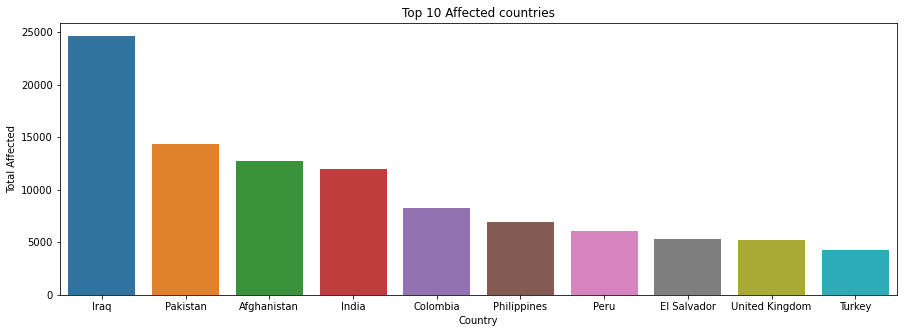

In [27]:
# Visualization
top_countries= df.Country.value_counts()[:10].reset_index()
top_countries.columns=["Country","Total Affected"]
plt.subplots(figsize=(15,5))
sns.barplot(x=top_countries.Country,y=top_countries["Total Affected"])
plt.title('Top 10 Affected countries')

In [26]:
# Get the top 10 regions affected in the data
pd.DataFrame(df["Region"].value_counts().head(10))

,Region
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456
East Asia,802


#### It shows that Middle East & North Africa is the most affected region.

Text(0.5, 1.0, 'Top 10 Affected regions')

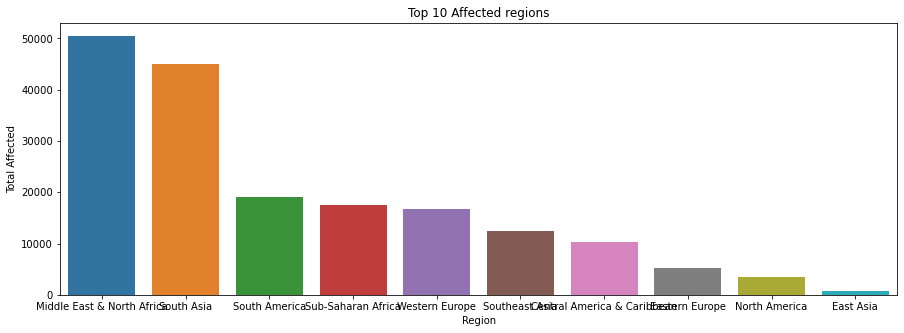

In [39]:
# Visualization
top_regions= df.Region.value_counts()[:10].reset_index()
top_regions.columns=["Region","Total Affected"]
plt.subplots(figsize=(15,5))
sns.barplot(x=top_regions.Region,y=top_regions["Total Affected"])
plt.title('Top 10 Affected regions')

In [40]:
# Get the top 10 cities affected in the data
pd.DataFrame(df["City"].value_counts().head(10))

,City
Unknown,9775
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048


#### We need to drop the Unknown value.

Text(0.5, 1.0, 'Top 10 Affected cities')

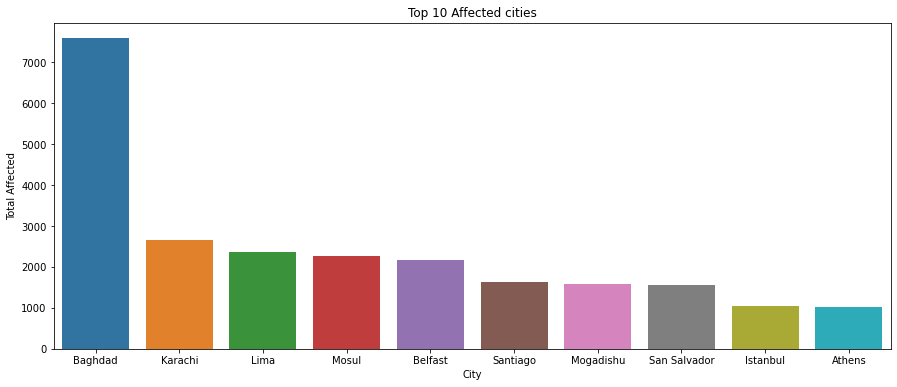

In [42]:
# Visualization
top_cities= df.City.value_counts()[:11].drop('Unknown').reset_index()
top_cities.columns=["City","Total Affected"]
plt.subplots(figsize=(15,6))
sns.barplot(x=top_cities.City,y=top_cities["Total Affected"])
plt.title('Top 10 Affected cities')

#### The most affected city is Baghdad

Text(0.5, 1.0, 'No. of terrorist activities every year')

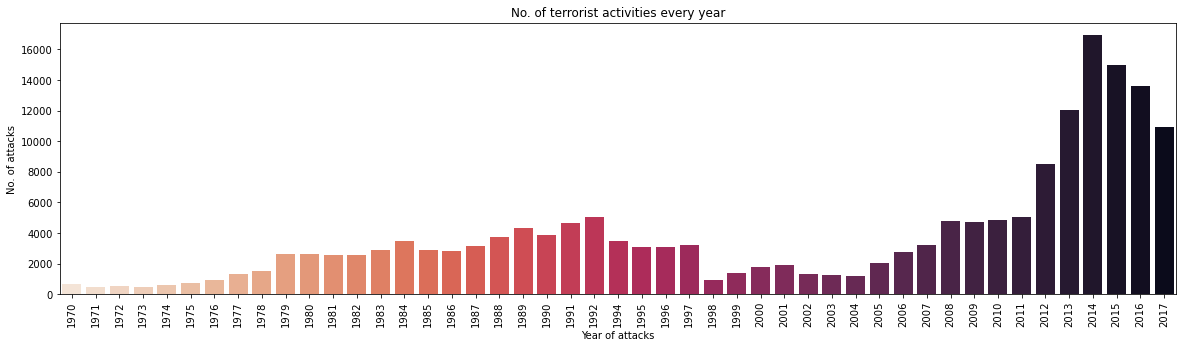

In [31]:
# Study the number of terror activities every year
plt.subplots(figsize=(20,5))
sns.countplot(x='Year',data=df,palette='rocket_r')
plt.xticks(rotation=90)
plt.xlabel('Year of attacks')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities every year')

#### It shows that the highest terror attacks happened in the year 2014

Text(0.5, 1.0, 'Weapons used')

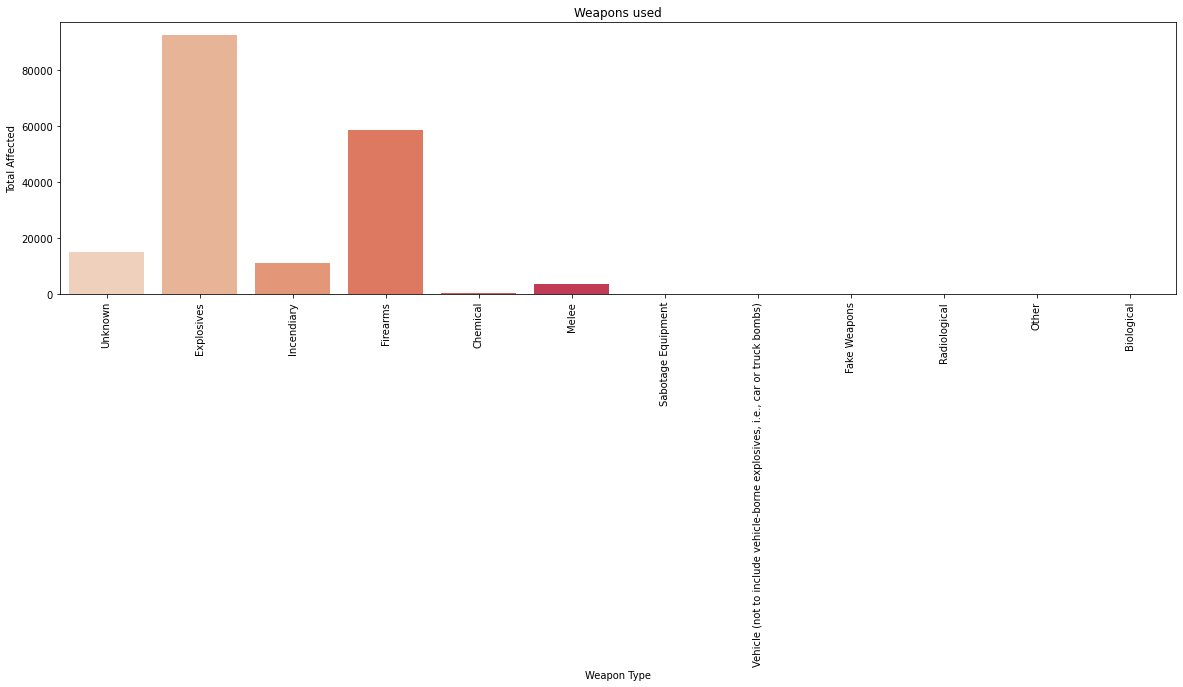

In [33]:
# Types of weapon used
plt.subplots(figsize=(20,5))
sns.countplot(x='Weapon Type',data=df,palette='rocket_r')
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.ylabel('Total Affected')
plt.title('Weapons used')

#### Explosives are the most used weapons

Text(0.5, 1.0, 'Active Terrorist Groups')

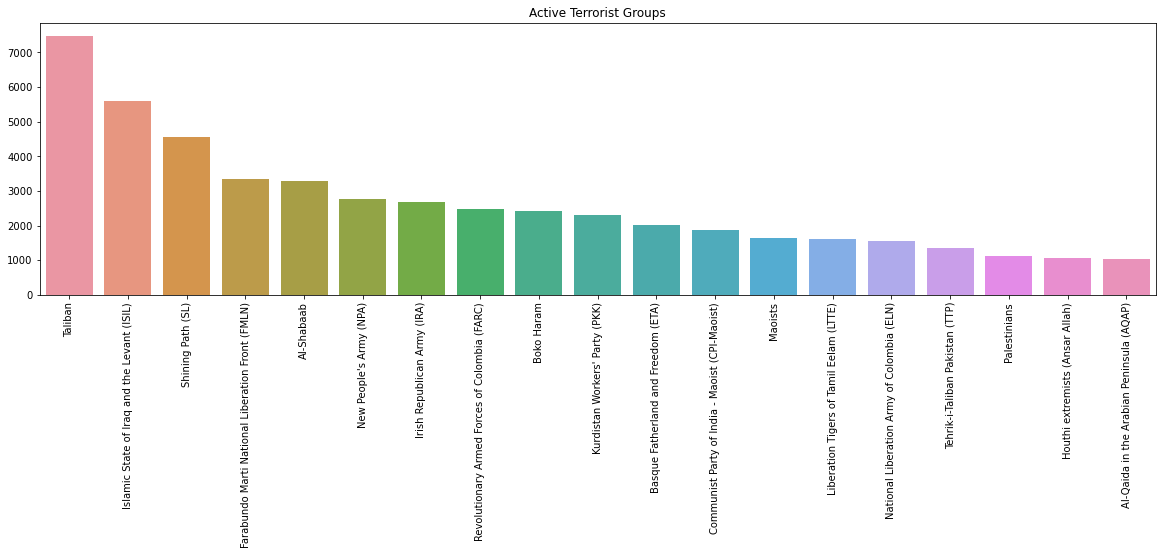

In [35]:
# Different terrorist groups
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Group Name'].value_counts()[1:20].index,y=df['Group Name'].value_counts()[1:20].values)
plt.title("Active Terrorist Groups")

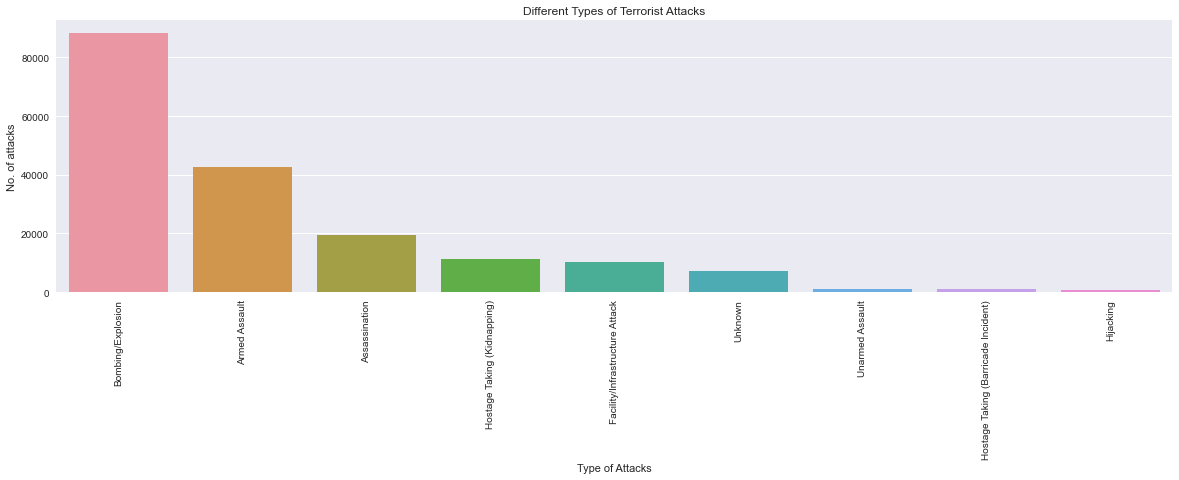

In [36]:
# Types pf attacks
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Attack Type'].value_counts().index,y=df['Attack Type'].value_counts().values)
plt.xlabel('Type of Attacks')
plt.ylabel('No. of attacks')
plt.title('Different Types of Terrorist Attacks')
plt.show()

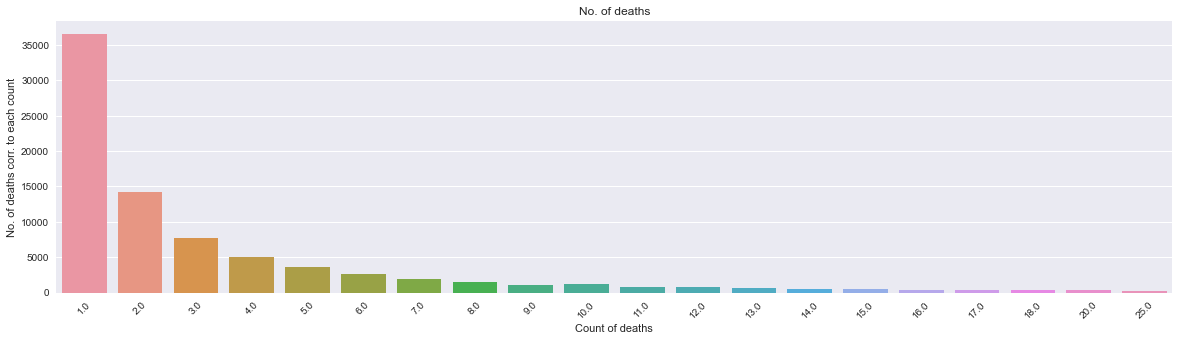

In [37]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x=df['Killed'].value_counts()[1:25].index,y=df['Killed'].value_counts()[1:25].values)
plt.xlabel('Count of deaths')
plt.ylabel('No. of deaths corr. to each count')
plt.title('No. of deaths')
plt.show()

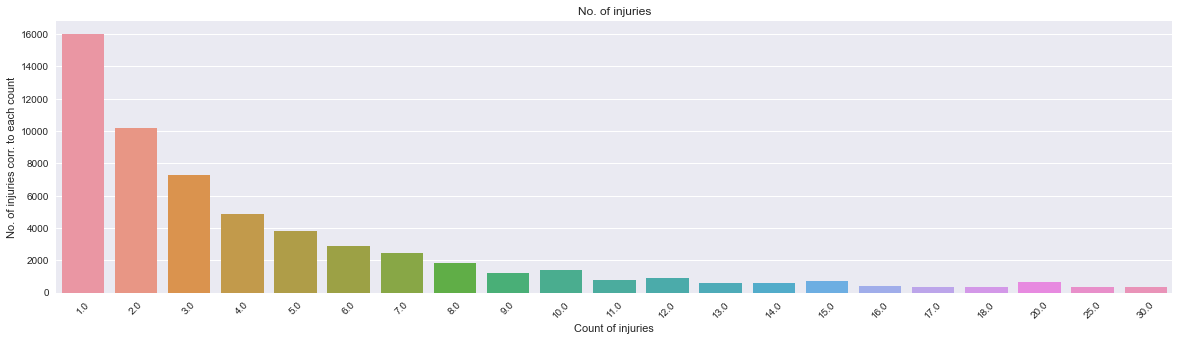

In [38]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x=df['Wounded'].value_counts()[1:25].index,y=df['Wounded'].value_counts()[1:25].values)
plt.xlabel('Count of injuries')
plt.ylabel('No. of injuries corr. to each count')
plt.title('No. of injuries')
plt.show()

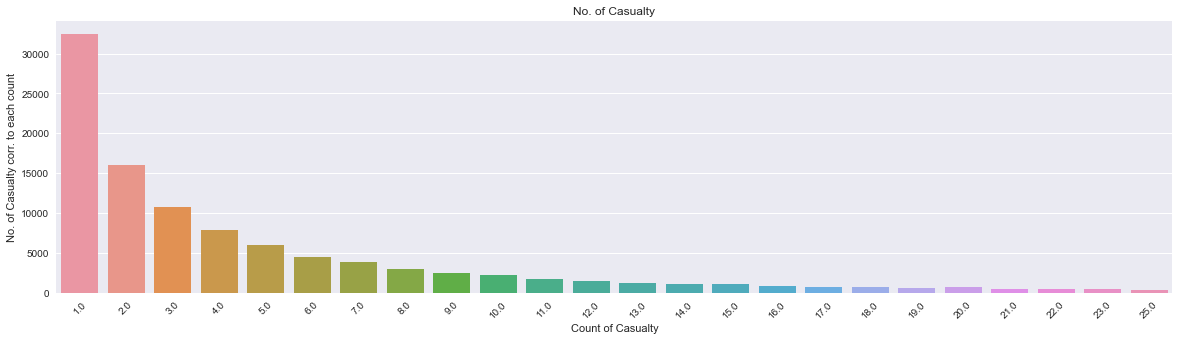

In [39]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x=df['Casualty'].value_counts()[1:25].index,y=df['Casualty'].value_counts()[1:25].values)
plt.xlabel('Count of Casualty')
plt.ylabel('No. of Casualty corr. to each count')
plt.title('No. of Casualty')
plt.show()

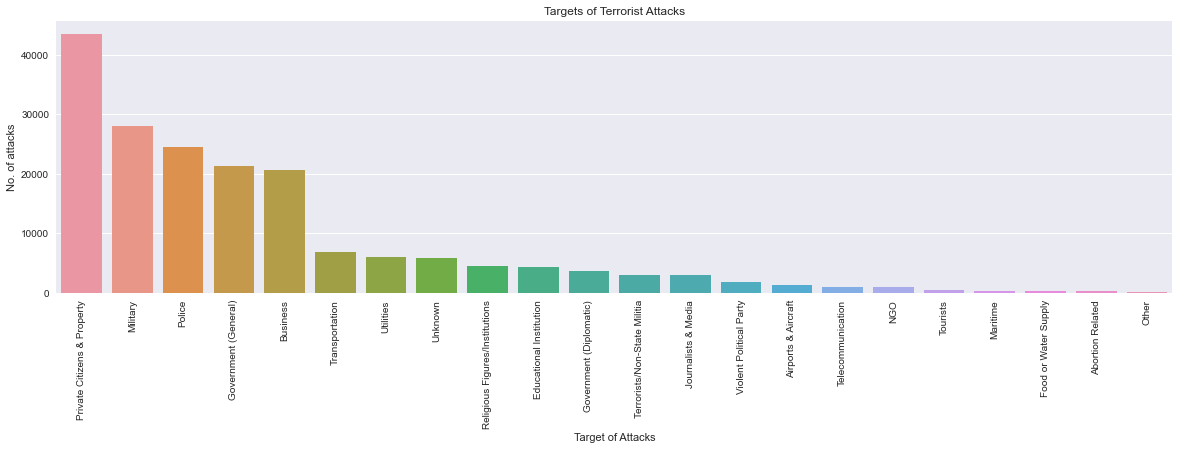

In [40]:
# Target of attacks
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Target Type'].value_counts()[:30].index,y=df['Target Type'].value_counts()[:30].values)
plt.xlabel('Target of Attacks')
plt.ylabel('No. of attacks')
plt.title('Targets of Terrorist Attacks')
plt.show()

### Conclusions:-
#### 1. Private Citizens & Property are the most frequent targets for terror attacks
#### 2. Bombing/Explosion is the most used type of attacks
#### 3. Taliban is the most active terrorist group as per the dataset
#### 4. Explosives are the most used weapons
#### 5. The highest terror attacks happened in the year 2014
#### 6. Iraq is the most affected country and India is on the 4th position from top.
#### 7. Middle East & North Africa is the most affected region
#### 8. The most affected city is Baghdad